In [ ]:
###################### CREATION D'UNE GRILLE DE CHALEUR ######################
import seaborn as sns
#matrice de covariance
X1 = france_years[1][1:]
X2 = usa_years[1][1:]
X3 = china_years[1][1:]
X4 = germany_years[1][1:]
X5 = spain_years[1][1:]
X6 = russia_years[1][1:]

"""covX1X2 = np.corrcoef(X1,X2)
covX2X3 = np.corrcoef(X2,X3)
covX1X3 = np.corrcoef(X1,X3)
"""


df = pd.DataFrame({
    'France': X1,
    'USA' : X2,
    'China' : X3,
    'Germany' : X4,
    'Spain' : X5,
    'Russia' : X6    
})



corr_df = df.corr(method='pearson')
sns.heatmap(corr_df, annot=True, cmap='YlOrRd')
plt.title("Grille de chaleur concernant la corrélation entre nos 6 pays différents")
plt.show()

# DATA731 Evolution des températures dans différents pays

https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv

In [91]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.signal import freqz
import random 
from pyneurgen.neuralnet import NeuralNet
from pyneurgen.nodes import BiasNode, Connection

In [92]:
###################### TRAITEMENT DES DONNEES ######################
data_france = [[],[]]
data_usa = [[],[]]
data_china = [[],[]]
data_germany = [[],[]]
data_spain = [[],[]]
data_russia = [[],[]]

# Nous allons prendre 6 pays : France - USA - Chine - Allemagne - Espagne - Russie
with open('data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            if (row[3] == "France"):
                data_france[0].append(row[0])
                data_france[1].append(row[1])
            if (row[3] == "United States"):
                data_usa[0].append(row[0])
                data_usa[1].append(row[1])
            if (row[3] == "China"):
                data_china[0].append(row[0])
                data_china[1].append(row[1])
            if (row[3] == "Germany"):
                data_germany[0].append(row[0])
                data_germany[1].append(row[1])
            if (row[3] == "Spain"):
                data_spain[0].append(row[0])
                data_spain[1].append(row[1])
            if (row[3] == "Russia"):
                data_russia[0].append(row[0])
                data_russia[1].append(row[1])


Column names are dt, AverageTemperature, AverageTemperatureUncertainty, Country


In [93]:
data_france = [data_france[0][-1200:],data_france[1][-1200:]]
data_usa = [data_usa[0][-1200:],data_usa[1][-1200:]]
data_china = [data_china[0][-1200:],data_china[1][-1200:]]
data_germany = [data_germany[0][-1200:],data_germany[1][-1200:]]
data_spain = [data_spain[0][-1200:],data_spain[1][-1200:]]
data_russia = [data_russia[0][-1200:],data_russia[1][-1200:]]

print(len(data_france[0]))
print(data_france[0][0])

1200
1913-10-01


In [94]:
###################### REGROUPEMENT PAR PAYS ######################
# Création des tableaux [[années, températures]]
def dataplot(liste_data, liste_data_years):
    moyenne = 0 
    for i in range(len(liste_data[0]) - 12):
        if liste_data[0][i][5:7] != "12":
            moyenne += float(liste_data[1][i])
        else:
            moyenne += float(liste_data[1][i])
            liste_data_years[0].append(int(liste_data[0][i][0:4]))
            liste_data_years[1].append(moyenne/12)
            moyenne = 0
    return liste_data_years

In [95]:
data_russia_years = [[],[]]
russia_years = dataplot(data_russia, data_russia_years)

data_spain_years = [[],[]]
spain_years = dataplot(data_spain, data_spain_years)

data_france_years = [[],[]]
france_years = dataplot(data_france, data_france_years)

data_china_years = [[],[]]
china_years = dataplot(data_china, data_china_years)

data_germany_years = [[],[]]
germany_years = dataplot(data_germany, data_germany_years)

data_usa_years = [[],[]]
usa_years = dataplot(data_usa, data_usa_years)

Text(0.5, 1.0, 'Spain')

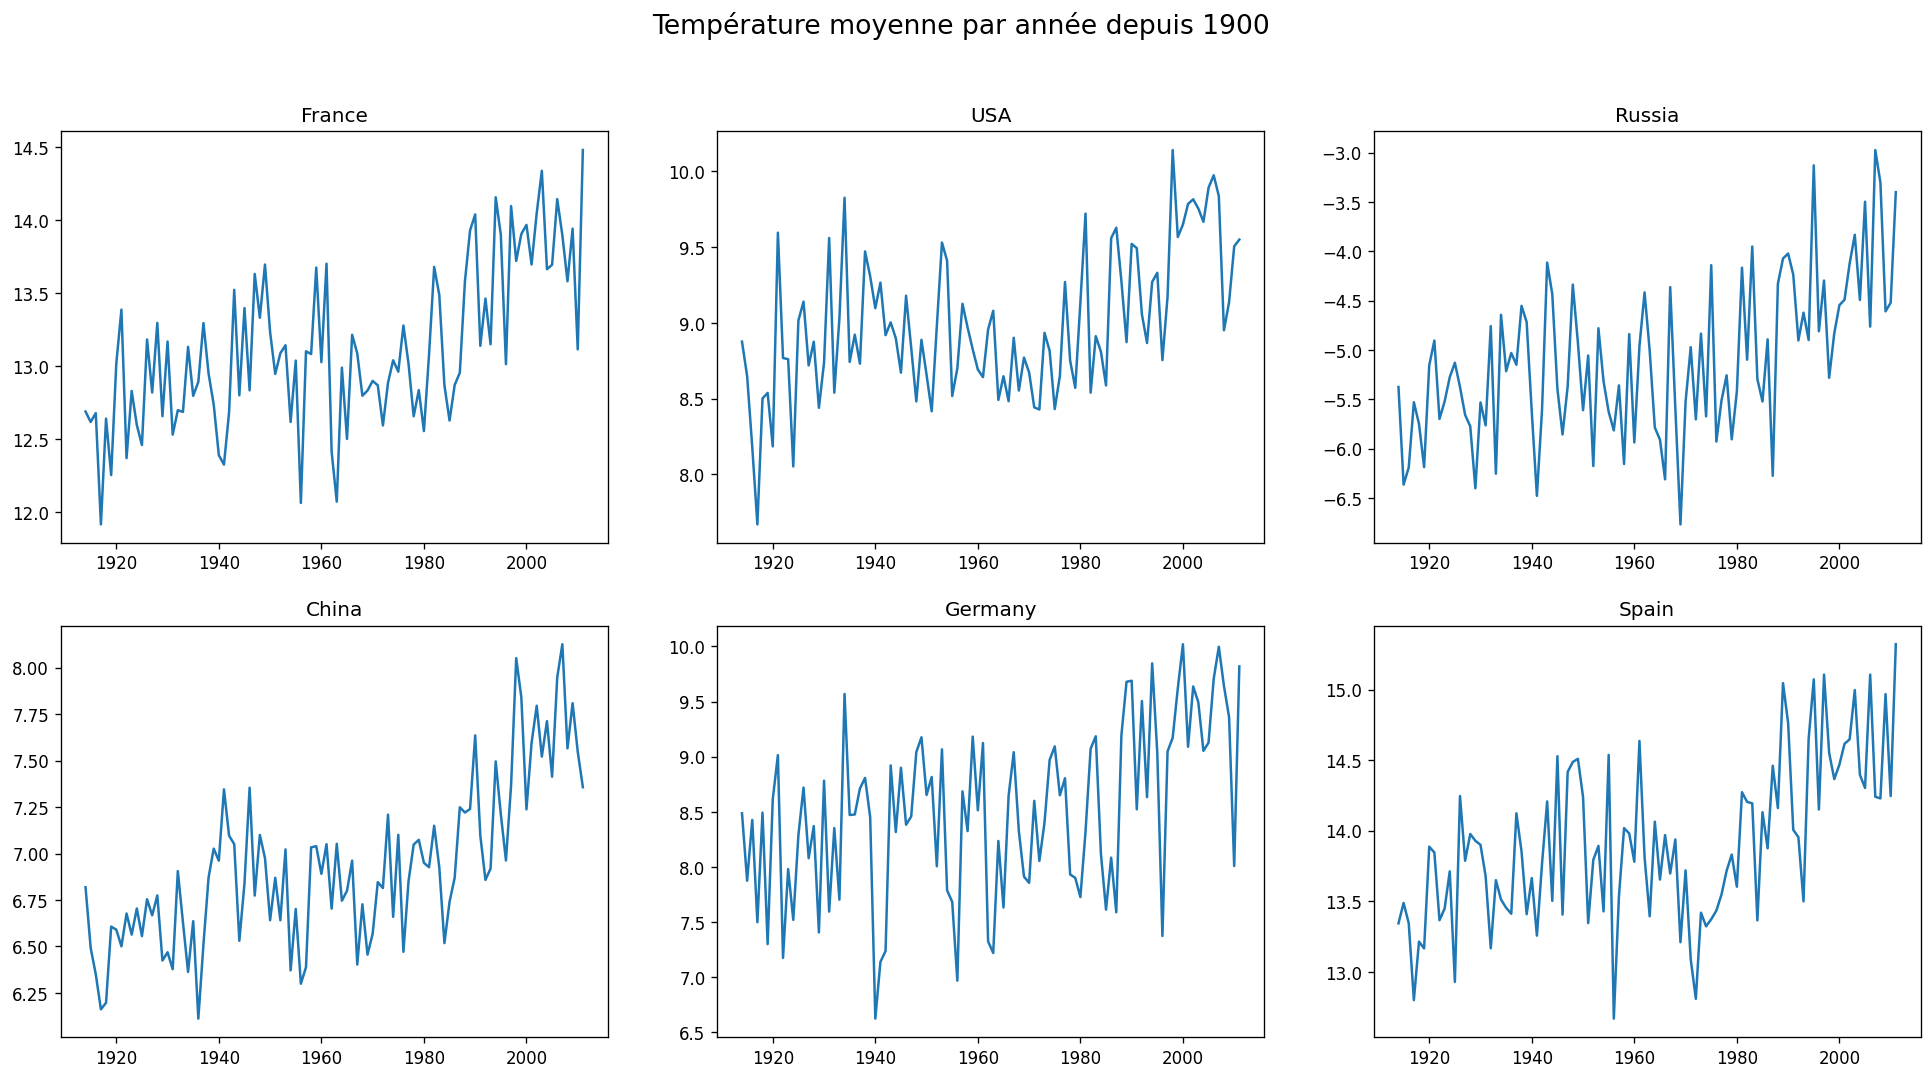

In [96]:
# Tracé des différentes données selon les pays
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.suptitle("Température moyenne par année depuis 1900", fontsize=16)
ax = axs[0,0]
ax.plot(france_years[0][1:],france_years[1][1:])
ax.set_title("France")
ax = axs[0,1]
ax.plot(usa_years[0][1:],usa_years[1][1:])
ax.set_title("USA")
ax = axs[1,0]
ax.plot(china_years[0][1:],china_years[1][1:])
ax.set_title("China")
ax = axs[1,1]
ax.plot(germany_years[0][1:],germany_years[1][1:])
ax.set_title("Germany")
ax = axs[0,2]
ax.plot(russia_years[0][1:],russia_years[1][1:])
ax.set_title("Russia")
ax = axs[1,2]
ax.plot(spain_years[0][1:],spain_years[1][1:])
ax.set_title("Spain")


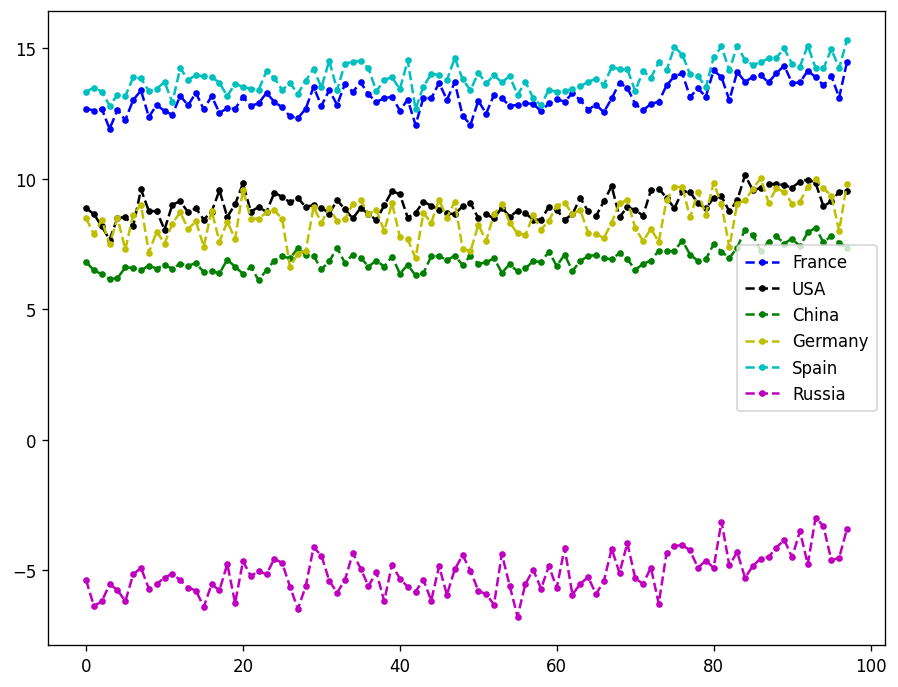

In [120]:
plt.plot(france_years[1][1:], '.--b')
plt.plot(usa_years[1][1:], '.--k')
plt.plot(china_years[1][1:], '.--g')
plt.plot(germany_years[1][1:], '.--y')
plt.plot(spain_years[1][1:], '.--c')
plt.plot(russia_years[1][1:], '.--m')
plt.legend(["France","USA","China","Germany","Spain","Russia"], loc=5, mode="None", borderpad=0.5)


# Comparaison France-Espagne

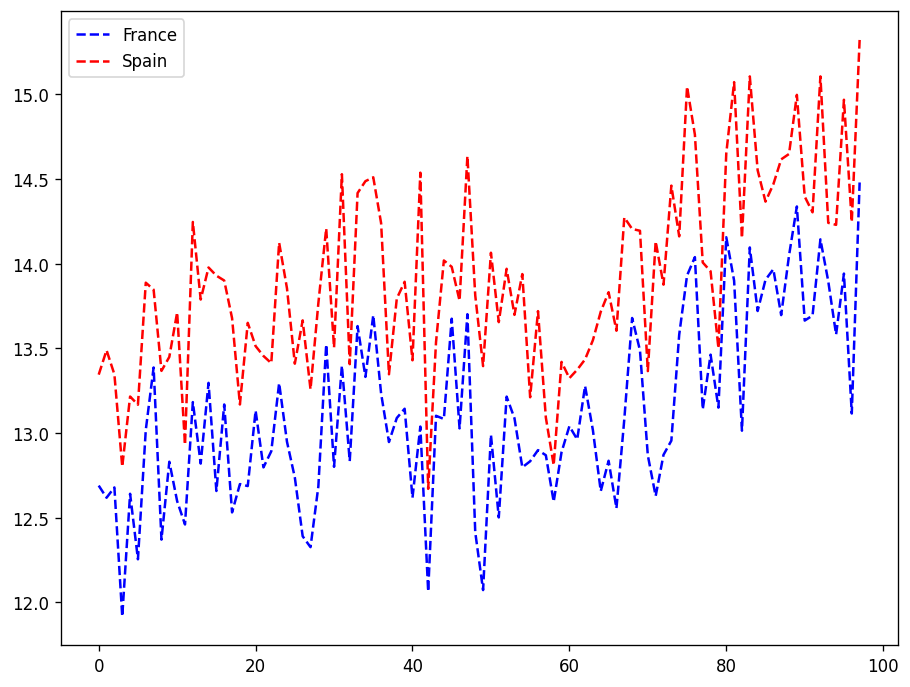

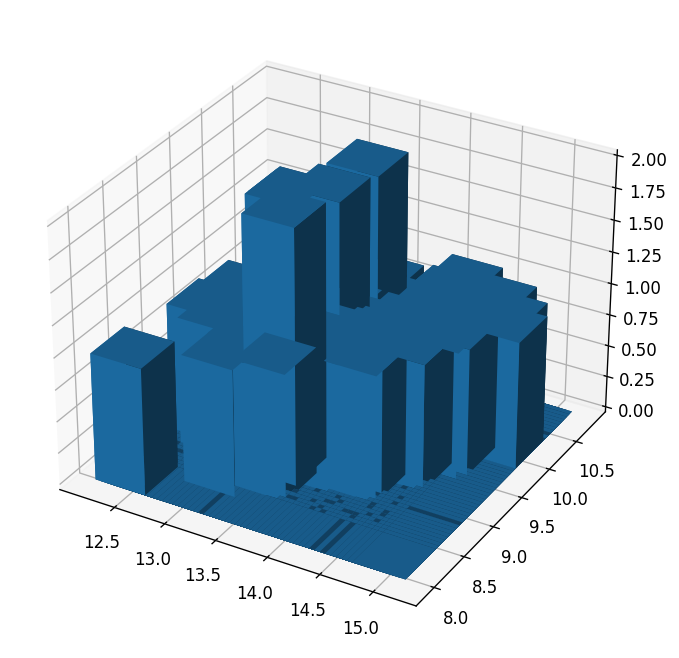

In [98]:
plt.plot(data_france_years[1][1:], '--b')
plt.plot(data_spain_years[1][1:], '--r')
plt.legend(["France","Spain"])


fig = plt.figure()
ax = plt.axes(projection='3d')
hist, xedges, yedges = np.histogram2d(X1, X2, bins=50)

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.savefig("3d.png")


Text(0.5, 1.0, "Fonction d'autocorrelation X2 : Spain")

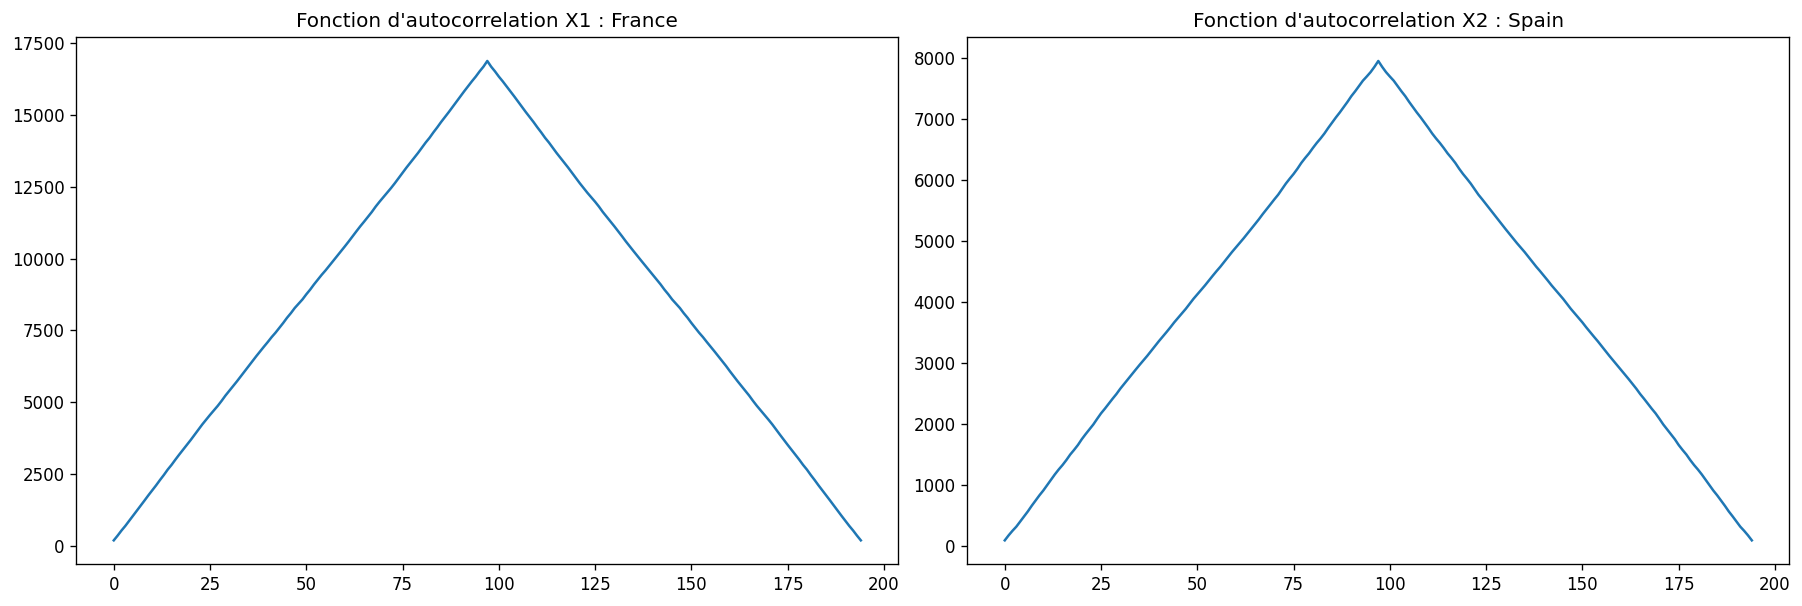

In [99]:
def spectre(*args): 
	Np = 200 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)


'''f,mag=spectre(X1,X2)
plt.semilogy(
	f,mag[0],'-r',
	f,mag[1],'-b'
)
plt.legend(['Spectre X1','Spectre X2'])
plt.show()'''



fig, axs = plt.subplots(1,2, figsize=(15,5))

fig.tight_layout()
ax = axs[0]
ax.plot(np.correlate(X1,X1, mode= "full"))
ax.set_title("Fonction d'autocorrelation X1 : France")
ax = axs[1]
ax.plot(np.correlate(X2,X2, mode= "full"))
ax.set_title("Fonction d'autocorrelation X2 : Spain")


In [100]:
def entropie(mu1,mu2, si1, si2):
    return ((1/2) * ((mu1-mu2)**2) * (1/((si1**2)+(si2**2))) + (1/2) * (((si2**2)/(si1**2)) + ((si1**2)/(si2**2))) - 1)

def calc_entropie_max_globale(data, marge, ax):
    X = np.array(data[1][1:])
    tab_ent = [[],[]]
    max = 0
    m = 0
    for i in range(marge, len(X)-marge):
        y1 = X[0:i]
        y2 = X[i:len(X)]
        ent = entropie(y1.mean(), y2.mean(), y1.std(), y2.std())
        if max<ent:
            max = ent
            m = i
        tab_ent[0].append(i+data[0][1])
        tab_ent[1].append(ent)
    ax.plot(tab_ent[0],tab_ent[1])
    """print("Avec une recherche de maximum, on trouve que l'entropie max : \n   Se trouve à", data[0][m], " \n   Et est", max)
    print("Avant le changement, on a les valeurs : \n   Moyenne = ", X[0:m].mean(), "\n   Ecart type = ", X[0:m].std())
    print("Après le changement, on a les valeurs : \n   Moyenne = ", X[m:len(X)].mean(), "\n   Ecart type = ", X[m:len(X)].std())"""

    return [data[0][m], X[0:m].mean(), X[m:len(X)].mean()]

        

Text(0.5, 1.0, 'Spain')

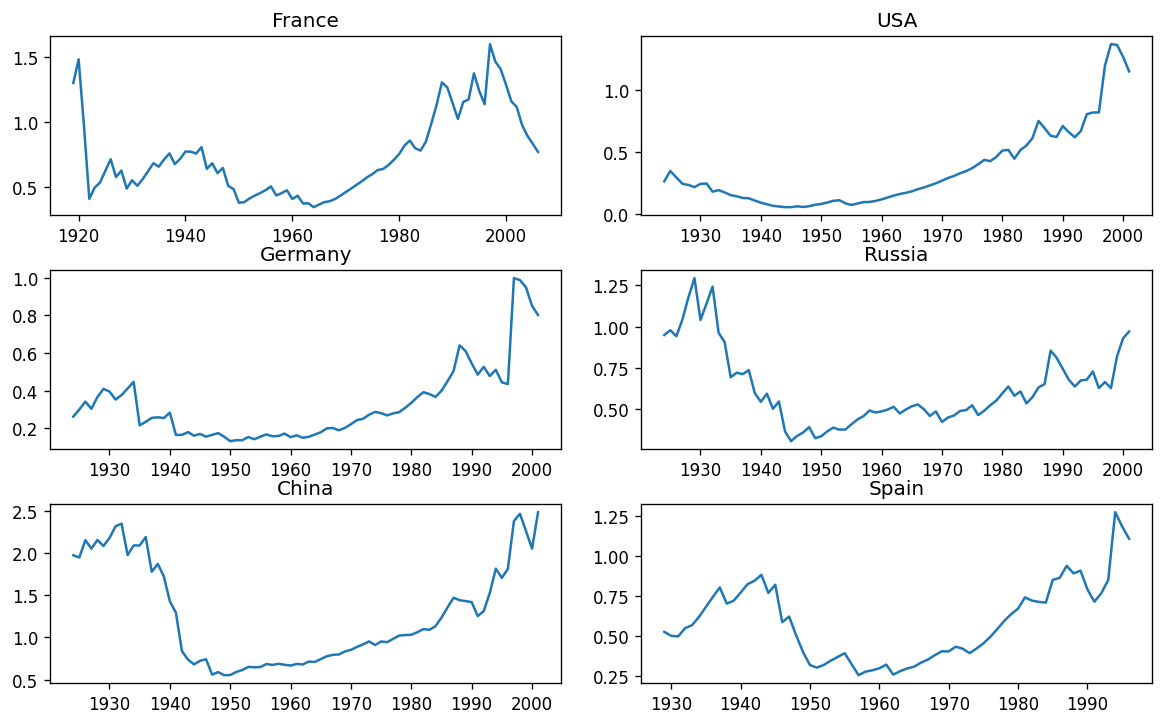

In [101]:
fig, axs = plt.subplots(3,2, figsize=(10,6))
fig.tight_layout()

entro_france = calc_entropie_max_globale(np.array(data_france_years),5, axs[0,0])
axs[0,0].set_title("France")
entro_usa = calc_entropie_max_globale(np.array(data_usa_years),10, axs[0,1])
axs[0,1].set_title("USA")
entro_germany = calc_entropie_max_globale(np.array(data_germany_years),10, axs[1,0])
axs[1,0].set_title("Germany")
entro_russia = calc_entropie_max_globale(np.array(data_russia_years),10, axs[1,1])
axs[1,1].set_title("Russia")
entro_china = calc_entropie_max_globale(np.array(data_china_years),10, axs[2,0])
axs[2,0].set_title("China")
entro_spain = calc_entropie_max_globale(np.array(data_spain_years),15, axs[2,1])
axs[2,1].set_title("Spain")

Text(0.5, 1.0, 'Spain')

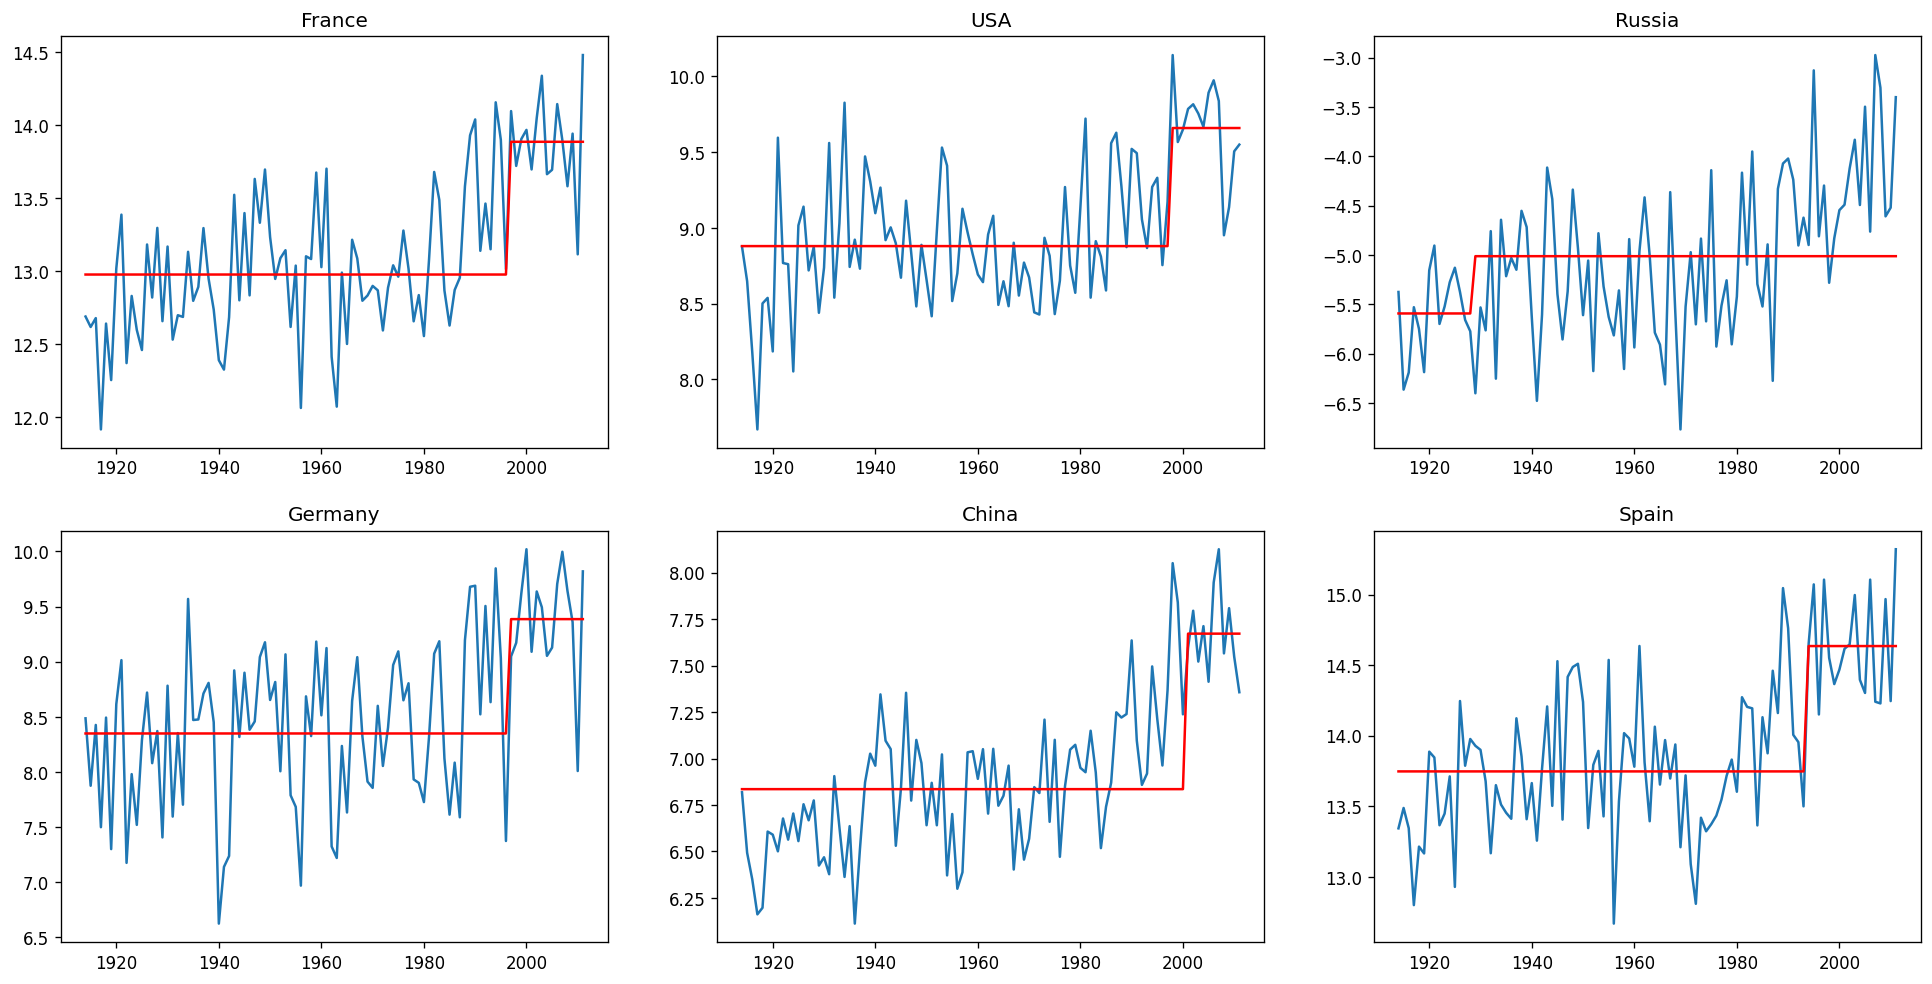

In [102]:
moyennes_france = [[france_years[0][1],int(entro_france[0]),int(entro_france[0]+1),france_years[0][len(france_years[0])-1]], [entro_france[1],entro_france[1],entro_france[2],entro_france[2]]]

moyennes_usa = [[usa_years[0][1],int(entro_usa[0]),int(entro_usa[0]+1),usa_years[0][len(usa_years[0])-1]], [entro_usa[1],entro_usa[1],entro_usa[2],entro_usa[2]]]

moyennes_russia = [[russia_years[0][1],int(entro_russia[0]),int(entro_russia[0]+1),russia_years[0][len(russia_years[0])-1]], [entro_russia[1],entro_russia[1],entro_russia[2],entro_russia[2]]]

moyennes_germany = [[germany_years[0][1],int(entro_germany[0]),int(entro_germany[0]+1),germany_years[0][len(germany_years[0])-1]], [entro_germany[1],entro_germany[1],entro_germany[2],entro_germany[2]]]

moyennes_china = [[china_years[0][1],int(entro_china[0]),int(entro_china[0]+1),china_years[0][len(china_years[0])-1]], [entro_china[1],entro_china[1],entro_china[2],entro_china[2]]]

moyennes_spain = [[spain_years[0][1],int(entro_spain[0]),int(entro_spain[0]+1),spain_years[0][len(spain_years[0])-1]], [entro_spain[1],entro_spain[1],entro_spain[2],entro_spain[2]]]

fig, axs = plt.subplots(2,3,figsize=(20,10))

ax = axs[0,0]
ax.plot(france_years[0][1:],france_years[1][1:])
ax.plot(*moyennes_france, 'r')
ax.set_title("France")


ax = axs[0,1]
ax.plot(usa_years[0][1:],usa_years[1][1:])
ax.plot(*moyennes_usa, 'r')
ax.set_title("USA")

ax = axs[0,2]
ax.plot(russia_years[0][1:],russia_years[1][1:])
ax.plot(*moyennes_russia, 'r')
ax.set_title("Russia")

ax = axs[1,0]
ax.plot(germany_years[0][1:],germany_years[1][1:])
ax.plot(*moyennes_germany, 'r')
ax.set_title("Germany")

ax = axs[1,1]
ax.plot(china_years[0][1:],china_years[1][1:])
ax.plot(*moyennes_china, 'r')
ax.set_title("China")

ax = axs[1,2]
ax.plot(spain_years[0][1:],spain_years[1][1:])
ax.plot(*moyennes_spain, 'r')
ax.set_title("Spain")

In [103]:

df = pd.DataFrame(france_years[1])
print(df)

            0
0    2.728250
1   12.689750
2   12.618167
3   12.679000
4   11.916833
..        ...
94  13.896583
95  13.581500
96  13.941667
97  13.115417
98  14.479583

[99 rows x 1 columns]


Test MSE: 0.219


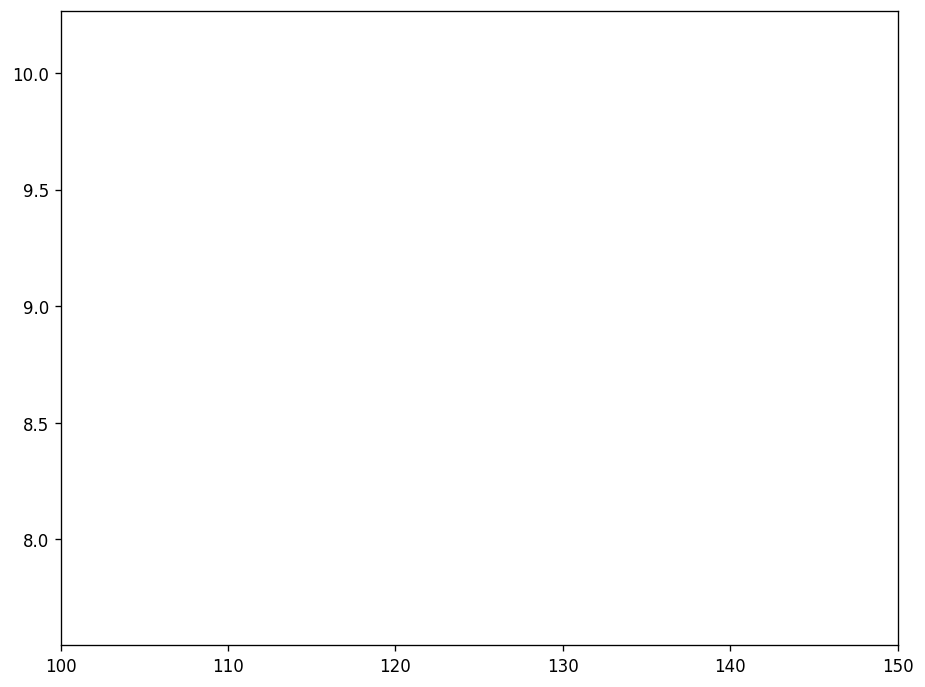

In [104]:
#MODELE PERSISTENT (Prédiction)
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from pandas import concat

values = pd.DataFrame(usa_years[1])
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
 
# plot predictions and expected results
plt.plot(train_y)
plt.xlim(right=150)  # adjust the right leaving left unchanged
plt.xlim(left=100)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()



In [105]:
#MODELE AR 
def lpc(mat, ordre):
    ys=[]
    for i in range(ordre+1):
        ys.append(np.matrix.transpose(np.array([0]*i + mat + [0]*(ordre-i))))

    array = []
    for y in ys:
        array.append(y)
    
    A = np.array(array)

    D = np.cov(A)

    E = np.matmul(-np.linalg.inv(D[0:ordre, 0:ordre]),np.matrix.transpose(D[0,1:ordre+1]))
    E1 = [1, *np.matrix.transpose(E)]

    return E1
    

NEUR

In [108]:
learn_france = []

for i in range(1,len(france_years[1])):
    learn_france.append([i,france_years[1][i]])

In [109]:
def data_gen(data):
    data_sort = [item for item in data]
    random.shuffle(data_sort)

    for item in data_sort:
        yield item

In [110]:
factor = 1.0 / float(len(learn_france))

all_inputs = []
all_targets = []

#   Build the inputs
for position, target in data_gen(learn_france):
    pos = float(position)
    all_inputs.append([random.random(), pos * factor])
    all_targets.append([target])

In [111]:
net = NeuralNet()
net.init_layers(2, [10], 1)

net.randomize_network()
net.set_halt_on_extremes(True)

#   Set to constrain beginning weights to -.5 to .5
#       Just to show we can
net.set_random_constraint(.5)
net.set_learnrate(.1)

In [112]:
net.set_all_inputs(all_inputs)
net.set_all_targets(all_targets)

In [113]:
length = len(all_inputs)
learn_end_point = int(length * .8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length -1 )

In [114]:
net.learn(epochs=200, show_epoch_results=False,
    random_testing=False)

In [115]:
mse = net.test()

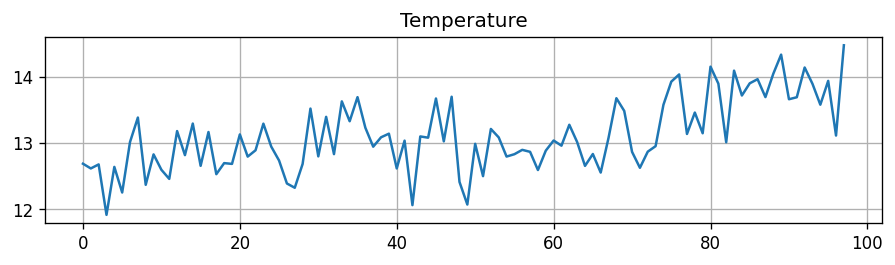

In [116]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]

#   This is quick and dirty, but it will show the results
plt.subplot(3, 1, 1)
plt.plot([i[1] for i in learn_france])
plt.title("Temperature")
plt.grid(True)

Text(0.5, 1.0, 'Test Target Points vs Actual Points')

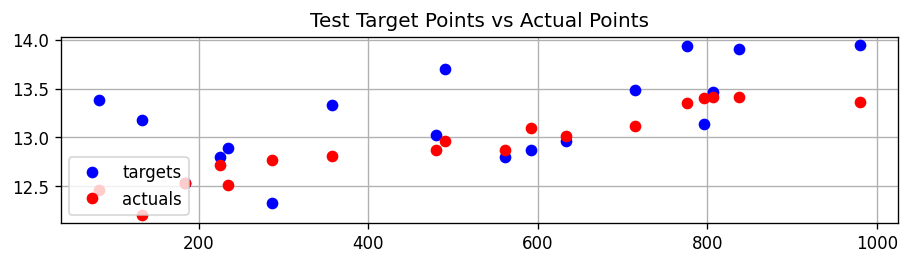

In [117]:
plt.subplot(3, 1, 2)
plt.plot(test_positions, all_targets1, 'bo', label='targets')
plt.plot(test_positions, allactuals, 'ro', label='actuals')
plt.grid(True)
plt.legend(loc='lower left', numpoints=1)
plt.title("Test Target Points vs Actual Points")

Text(0.5, 1.0, 'Mean Squared Error by Epoch')

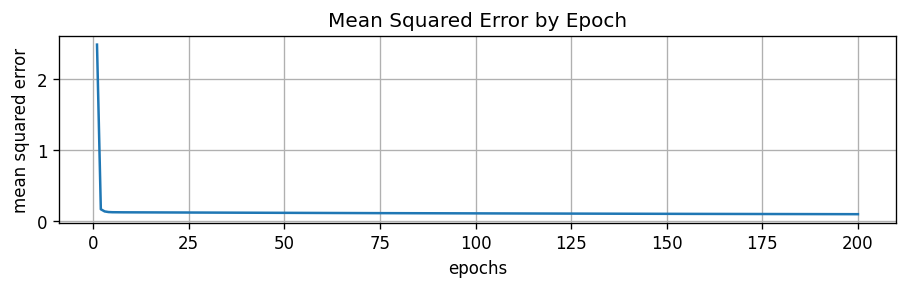

In [118]:
plt.subplot(3, 1, 3)
plt.plot(range(1, len(net.accum_mse) + 1, 1), net.accum_mse)
plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.grid(True)
plt.title("Mean Squared Error by Epoch")

0     8.876500
1     8.648250
2     8.180083
3     7.669500
4     8.501250
        ...   
93    9.837500
94    8.951417
95    9.137083
96    9.505583
97    9.549917
Name: 0, Length: 98, dtype: float64


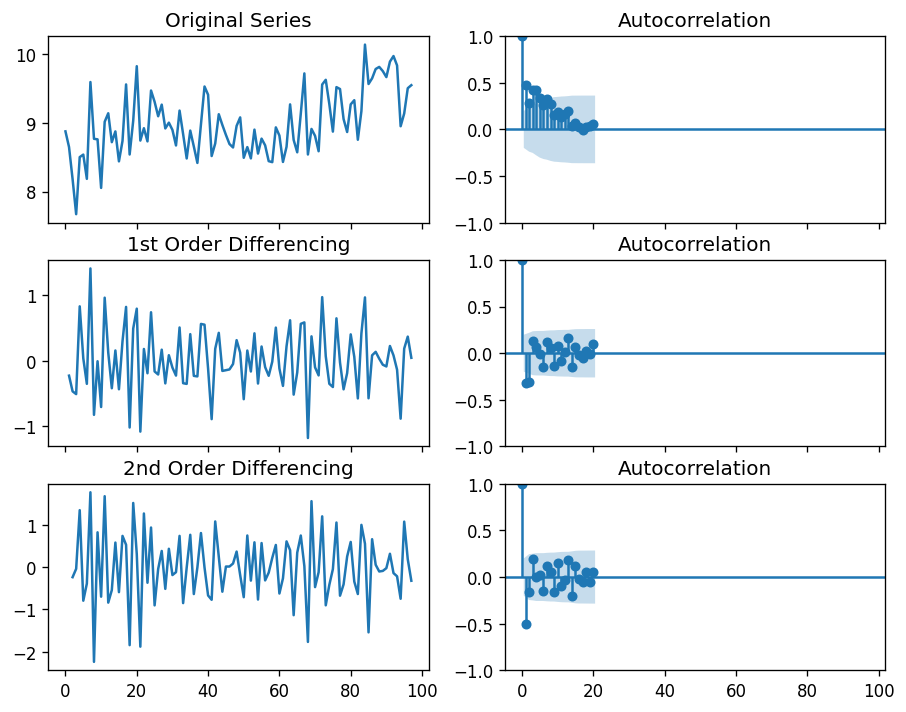

In [122]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df = pd.DataFrame(usa_years[1][1:])
print(df[0])
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df[0]); axes[0, 0].set_title('Original Series')
plot_acf(df[0], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df[0].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df[0].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df[0].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df[0].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [125]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[0], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   98
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -44.529
Date:                Wed, 12 Jan 2022   AIC                             97.059
Time:                        09:27:19   BIC                            107.358
Sample:                             0   HQIC                           101.223
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5838      0.257     -2.270      0.023      -1.088      -0.080
ma.L1         -0.0432      0.227     -0.191      0.849      -0.488       0.401
ma.L2         -0.6331      0.152     -4.166      0.0